In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v28
from Resources.Game import *


In [3]:
model = Model_v28()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v28')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v28/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 1500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [4]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.6343745589256287
validation error for model_batch 20: 0.664422333240509
validation error for model_batch 30: 0.6655564308166504
validation error for model_batch 40: 0.6394744515419006
validation error for model_batch 50: 0.6222336888313293
validation error for model_batch 60: 0.6342082619667053
validation error for model_batch 70: 0.6227375864982605
validation error for model_batch 80: 0.5784731507301331
validation error for model_batch 90: 0.5942696928977966
validation error for model_batch 100: 0.5032506585121155


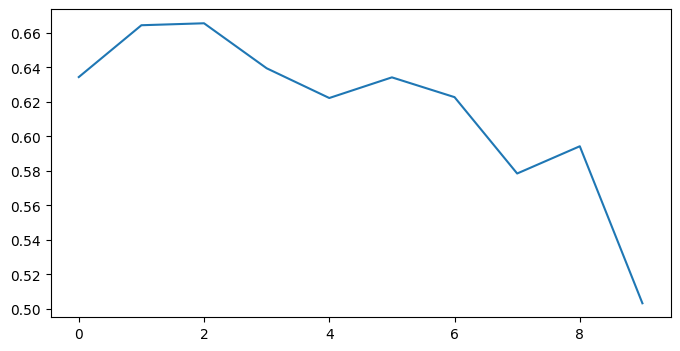

validation error for model_batch 110: 0.5109816193580627
validation error for model_batch 120: 0.596498966217041
validation error for model_batch 130: 0.5660300850868225
validation error for model_batch 140: 0.5383442640304565
validation error for model_batch 150: 0.5363044738769531
validation error for model_batch 160: 0.5098058581352234
validation error for model_batch 170: 0.5183665752410889
validation error for model_batch 180: 0.5571431517601013
validation error for model_batch 190: 0.5548088550567627
validation error for model_batch 200: 0.508135199546814


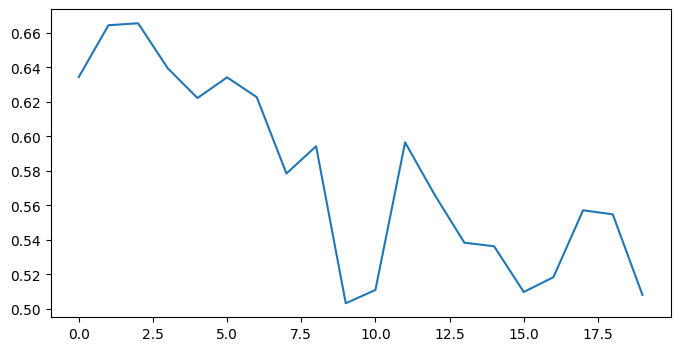

validation error for model_batch 210: 0.4870758056640625
validation error for model_batch 220: 0.5165695548057556
validation error for model_batch 230: 0.5064825415611267
validation error for model_batch 240: 0.5217145085334778
validation error for model_batch 250: 0.5120133757591248
validation error for model_batch 260: 0.5117660760879517
validation error for model_batch 270: 0.4890790581703186
validation error for model_batch 280: 0.5188403725624084
validation error for model_batch 290: 0.5284207463264465
validation error for model_batch 300: 0.5337416529655457


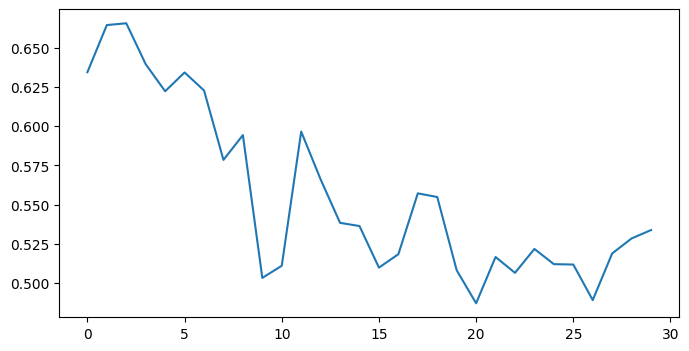

validation error for model_batch 310: 0.5273330807685852
validation error for model_batch 320: 0.4971871078014374
validation error for model_batch 330: 0.5027357339859009
validation error for model_batch 340: 0.5224298238754272
validation error for model_batch 350: 0.5127562284469604
validation error for model_batch 360: 0.48413169384002686
validation error for model_batch 370: 0.5359452962875366
validation error for model_batch 380: 0.5108408331871033
validation error for model_batch 390: 0.5100827217102051
validation error for model_batch 400: 0.45317861437797546


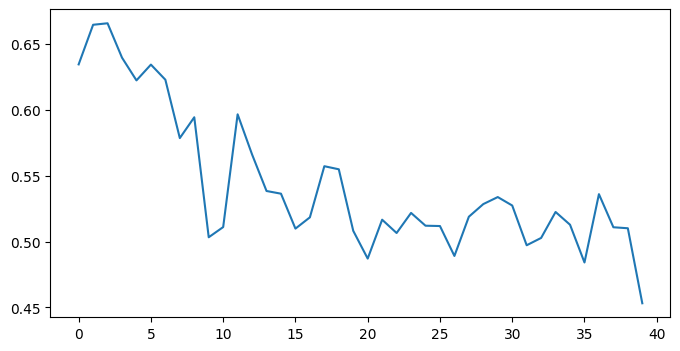

validation error for model_batch 410: 0.48631155490875244
validation error for model_batch 420: 0.47435262799263
validation error for model_batch 430: 0.4333435595035553
validation error for model_batch 440: 0.46119359135627747
validation error for model_batch 450: 0.4803837537765503
validation error for model_batch 460: 0.48425307869911194
validation error for model_batch 470: 0.49932384490966797
validation error for model_batch 480: 0.5320369005203247
validation error for model_batch 490: 0.49688220024108887
validation error for model_batch 500: 0.4939809739589691


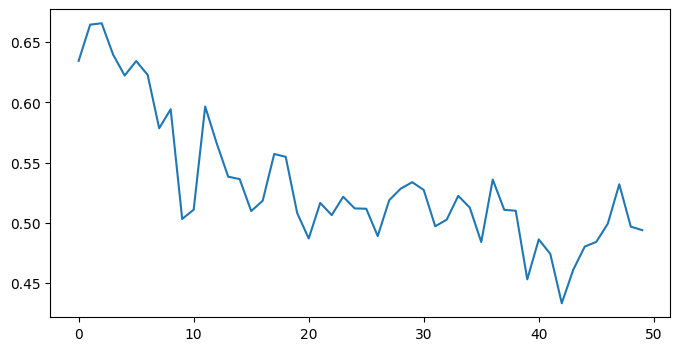

validation error for model_batch 510: 0.4639841318130493
validation error for model_batch 520: 0.48264041543006897
validation error for model_batch 530: 0.48083940148353577
validation error for model_batch 540: 0.5011857151985168
validation error for model_batch 550: 0.4888005256652832
validation error for model_batch 560: 0.516704797744751
validation error for model_batch 570: 0.4832483232021332
validation error for model_batch 580: 0.4723859131336212
validation error for model_batch 590: 0.4477173388004303
validation error for model_batch 600: 0.49149858951568604


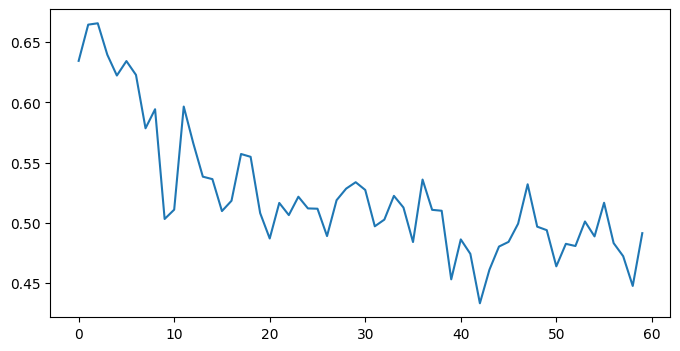

validation error for model_batch 610: 0.4316258728504181
validation error for model_batch 620: 0.4682985842227936
validation error for model_batch 630: 0.48610493540763855
validation error for model_batch 640: 0.4841180145740509
validation error for model_batch 650: 0.4310673773288727
validation error for model_batch 660: 0.5008334517478943
validation error for model_batch 670: 0.4511571228504181
validation error for model_batch 680: 0.44484755396842957
validation error for model_batch 690: 0.4503612220287323
validation error for model_batch 700: 0.4662282168865204


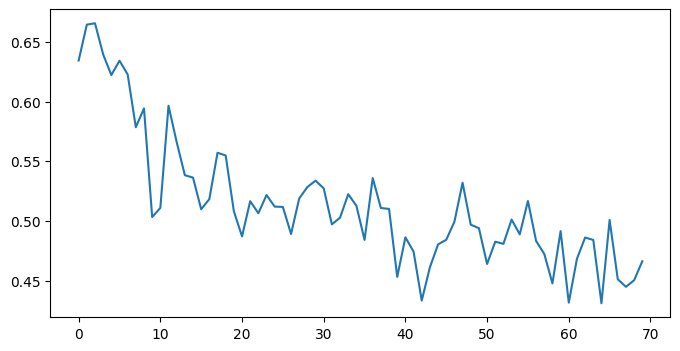

validation error for model_batch 710: 0.45828303694725037
validation error for model_batch 720: 0.4442485272884369
validation error for model_batch 730: 0.4450540244579315
validation error for model_batch 740: 0.46687400341033936
validation error for model_batch 750: 0.4580576717853546
validation error for model_batch 760: 0.45915359258651733
validation error for model_batch 770: 0.475414514541626
validation error for model_batch 780: 0.443025141954422
validation error for model_batch 790: 0.43185290694236755
validation error for model_batch 800: 0.45978280901908875


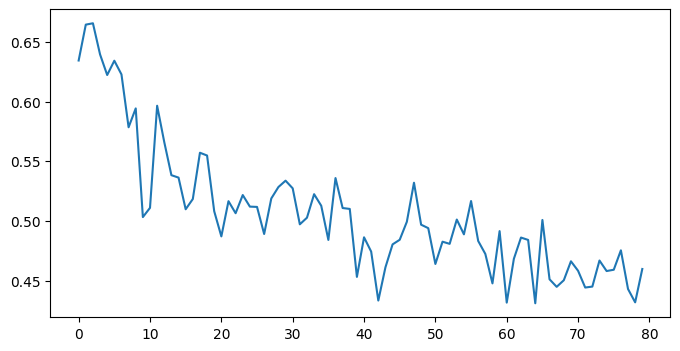

validation error for model_batch 810: 0.41276153922080994
validation error for model_batch 820: 0.45121243596076965
validation error for model_batch 830: 0.43811845779418945
validation error for model_batch 840: 0.456254243850708
validation error for model_batch 850: 0.43147847056388855
validation error for model_batch 860: 0.4541967809200287
validation error for model_batch 870: 0.4545959234237671
validation error for model_batch 880: 0.4439918100833893
validation error for model_batch 890: 0.4221208095550537
validation error for model_batch 900: 0.4329431653022766


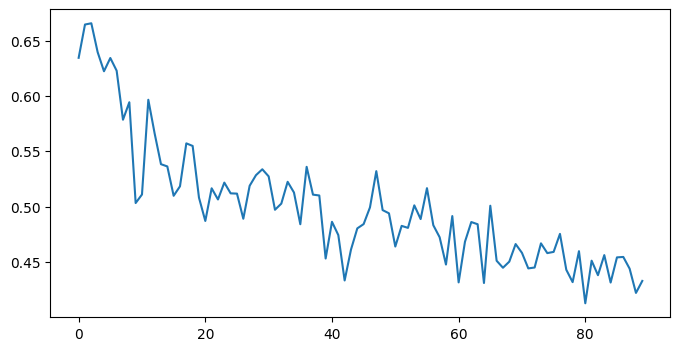

validation error for model_batch 910: 0.44589000940322876
validation error for model_batch 920: 0.4435432553291321
validation error for model_batch 930: 0.44331198930740356
validation error for model_batch 940: 0.46073246002197266
validation error for model_batch 950: 0.4265855550765991
validation error for model_batch 960: 0.421831339597702
validation error for model_batch 970: 0.43393486738204956
validation error for model_batch 980: 0.47672513127326965
validation error for model_batch 990: 0.44228649139404297
validation error for model_batch 1000: 0.45867276191711426


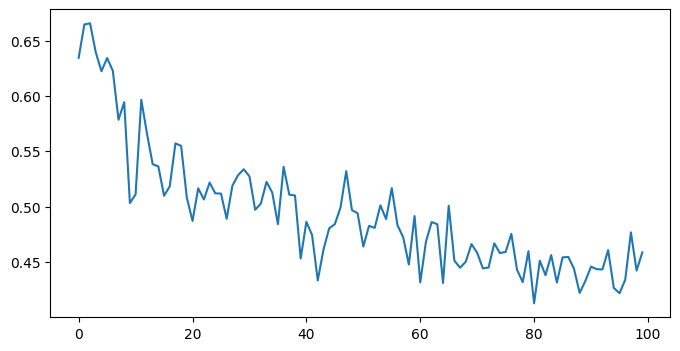

validation error for model_batch 1010: 0.48347264528274536
validation error for model_batch 1020: 0.4038825035095215
validation error for model_batch 1030: 0.45706838369369507
validation error for model_batch 1040: 0.4248742461204529
validation error for model_batch 1050: 0.44474390149116516
validation error for model_batch 1060: 0.46056458353996277
validation error for model_batch 1070: 0.41958215832710266
validation error for model_batch 1080: 0.4480130970478058
validation error for model_batch 1090: 0.4732218086719513
validation error for model_batch 1100: 0.4262210428714752


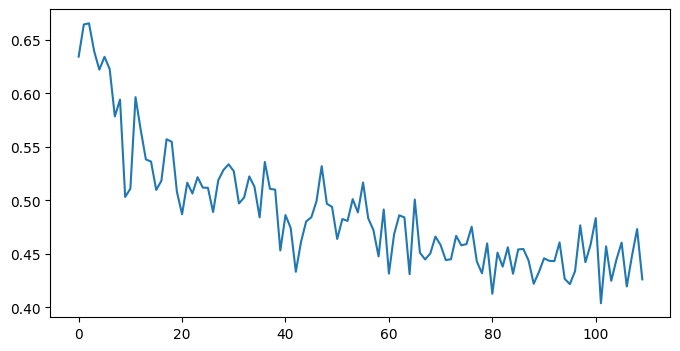

validation error for model_batch 1110: 0.46087703108787537
validation error for model_batch 1120: 0.44865503907203674
validation error for model_batch 1130: 0.42459753155708313
validation error for model_batch 1140: 0.4640800952911377
validation error for model_batch 1150: 0.42276808619499207
validation error for model_batch 1160: 0.445436030626297
validation error for model_batch 1170: 0.440718412399292
validation error for model_batch 1180: 0.4504779279232025
validation error for model_batch 1190: 0.39180341362953186
validation error for model_batch 1200: 0.45580384135246277


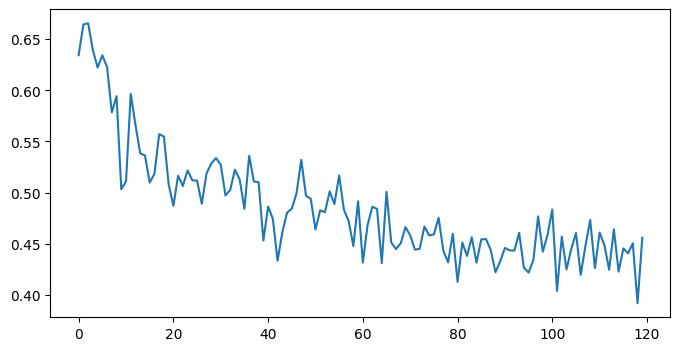

validation error for model_batch 1210: 0.4461216330528259
validation error for model_batch 1220: 0.4442446529865265
validation error for model_batch 1230: 0.42193931341171265
validation error for model_batch 1240: 0.4426386058330536
validation error for model_batch 1250: 0.43824392557144165
validation error for model_batch 1260: 0.4208739399909973
validation error for model_batch 1270: 0.43945884704589844
validation error for model_batch 1280: 0.4512036144733429
validation error for model_batch 1290: 0.42660290002822876
validation error for model_batch 1300: 0.4303022027015686


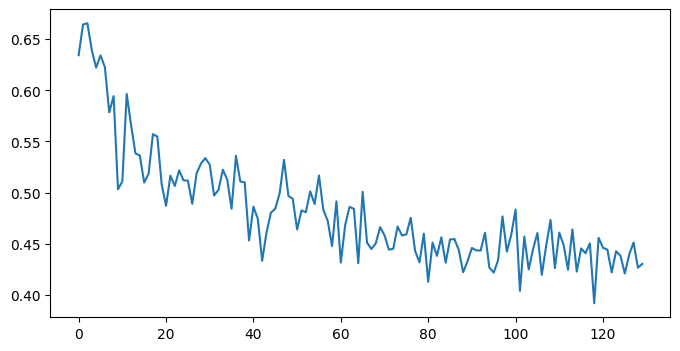

validation error for model_batch 1310: 0.4549803137779236
validation error for model_batch 1320: 0.41277703642845154
validation error for model_batch 1330: 0.4455887973308563
validation error for model_batch 1340: 0.40972790122032166
validation error for model_batch 1350: 0.4312944710254669
validation error for model_batch 1360: 0.3827964961528778
validation error for model_batch 1370: 0.4090278148651123
validation error for model_batch 1380: 0.42981141805648804
validation error for model_batch 1390: 0.4252159297466278
validation error for model_batch 1400: 0.43293526768684387


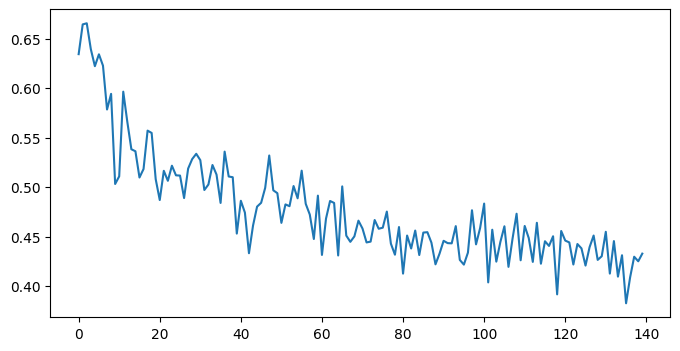

validation error for model_batch 1410: 0.4032297134399414
validation error for model_batch 1420: 0.43013322353363037
validation error for model_batch 1430: 0.4203484058380127
validation error for model_batch 1440: 0.41039589047431946
validation error for model_batch 1450: 0.4266722500324249
validation error for model_batch 1460: 0.43752530217170715
validation error for model_batch 1470: 0.4583739638328552
validation error for model_batch 1480: 0.48383066058158875
validation error for model_batch 1490: 0.4834253191947937
validation error for model_batch 1500: 0.5097859501838684


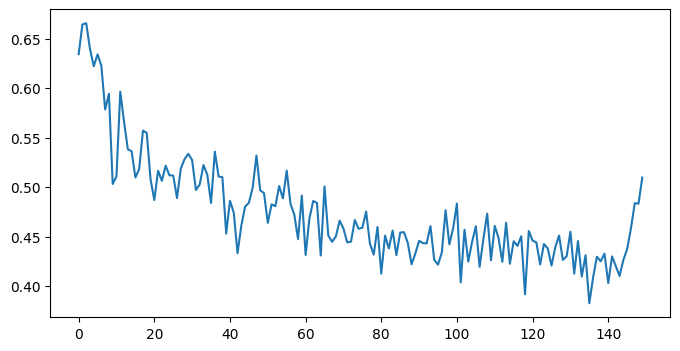

KeyboardInterrupt: 

In [5]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v28')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v28()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v28/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    torch.save(validation_error_list, 'validation_errors_v28')

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()